In [1]:
from hiive.mdptoolbox import example
import mdp
import gym
import numpy as np
from utils import *


In [2]:
env = gym.make('Taxi-v3')
P, R = example.openai("Taxi-v3", False)

max mean v 94433.03031059972


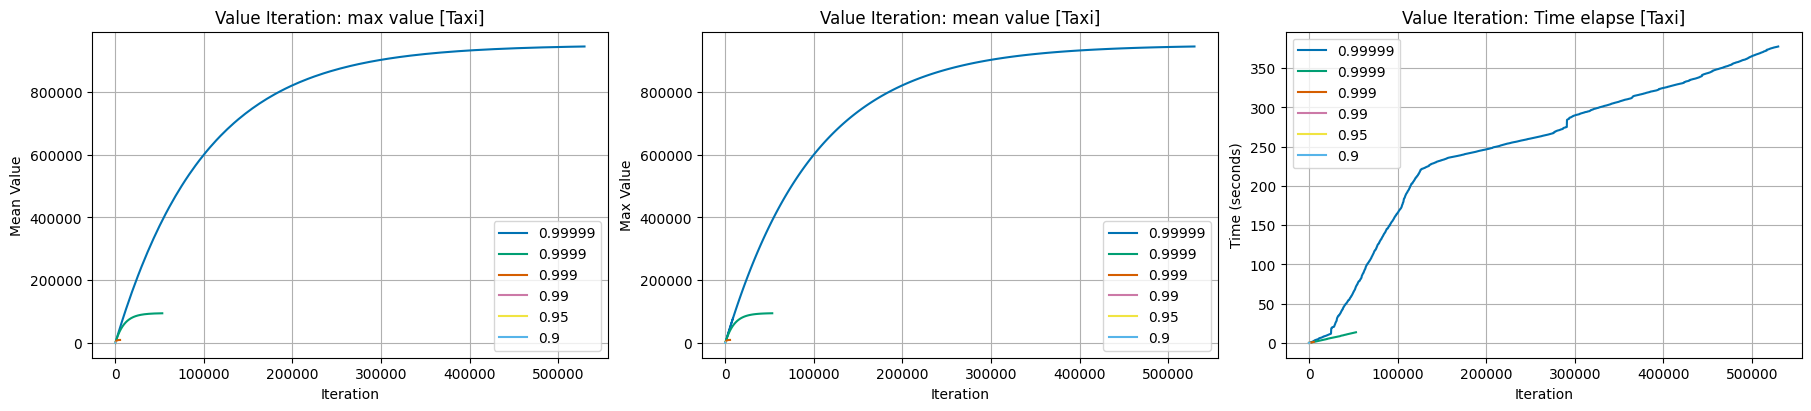

In [3]:
task = "Taxi"
method = "Value Iteration"
style = "-"
vi_results1 = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.ValueIteration(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    vi_results1.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(vi_results1[1]["Mean V"]))
magic_plot(vi_results1, task, method, style, x_list)

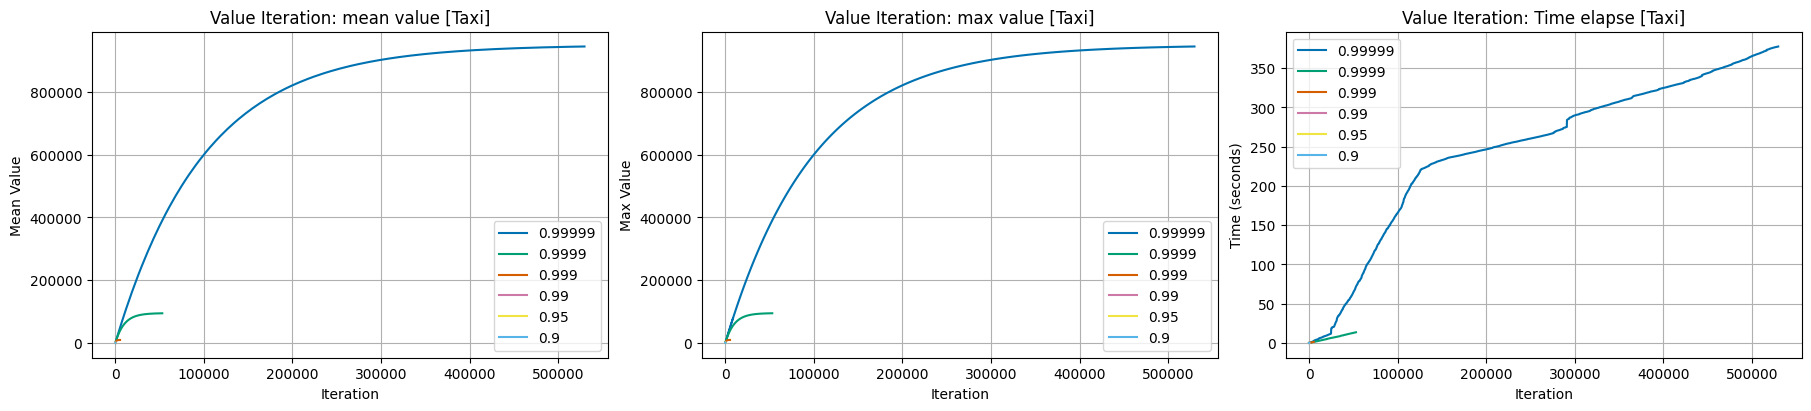

In [20]:
def magic_plot(results, task, method, style, x_list):
    fig, axs = plt.subplots(1 , 3,figsize=(18, 4), constrained_layout=True,)
    for i, x in enumerate(x_list):
        axs[0].plot(results[i]["Iteration"], results[i]["Mean V"], style)
    axs[0].set_ylabel("Mean Value")
    axs[0].set_xlabel("Iteration")
    axs[0].legend(x_list, loc='best')
    axs[0].set_title(f"{method}: mean value [{task}]")

    for i, x in enumerate(x_list):
        axs[1].plot(results[i]["Iteration"], results[i]["Max V"], style)
    axs[1].set_ylabel("Max Value")
    axs[1].set_xlabel("Iteration")
    axs[1].legend(x_list, loc='best')
    axs[1].set_title(f"{method}: max value [{task}]")

    for i, x in enumerate(x_list):
        axs[2].plot(results[i]["Iteration"], results[i]["times"], style)
    axs[2].set_ylabel("Time (seconds)")
    axs[2].set_xlabel("Iteration")
    axs[2].legend(x_list, loc='best')
    axs[2].set_title(f"{method}: Time elapse [{task}]")
    plt.show()
magic_plot(vi_results1, "Taxi", "Value Iteration", style, [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9])


max mean v 94907.91017559795


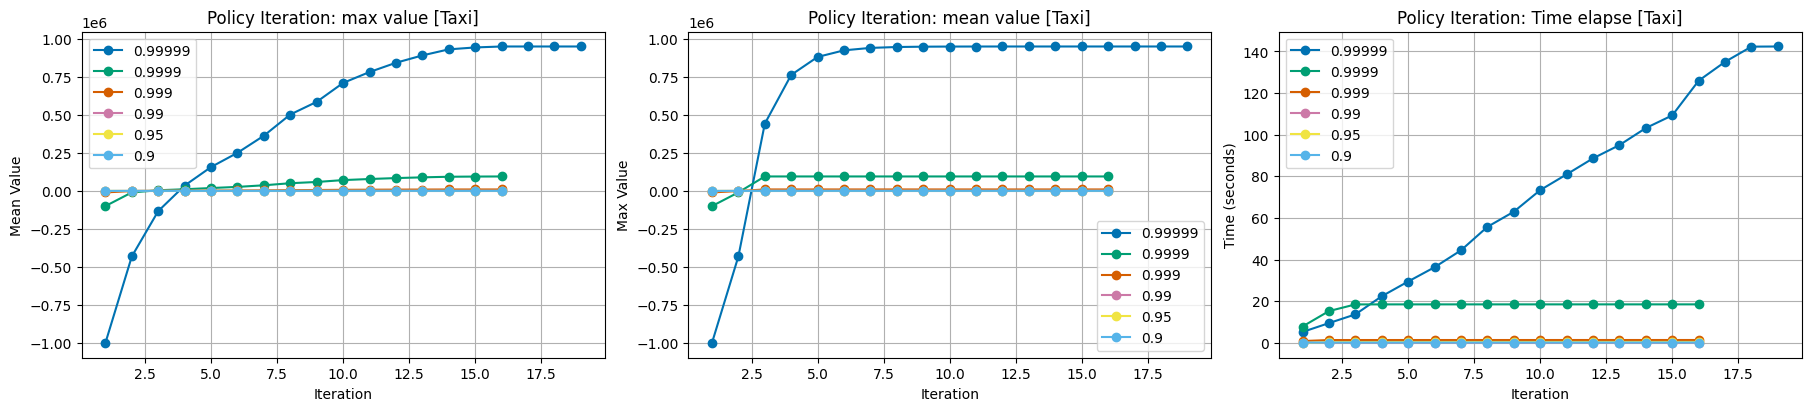

In [4]:
task = "Taxi"
method = "Policy Iteration"
pi_results1 = []
style = "o-"
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    pi_results1.append(pi_result)
    num_iters = len(pi_result["Mean V"])

print("max mean v", max(pi_results1[1]["Mean V"]))
magic_plot(pi_results1, task, method, style, x_list)

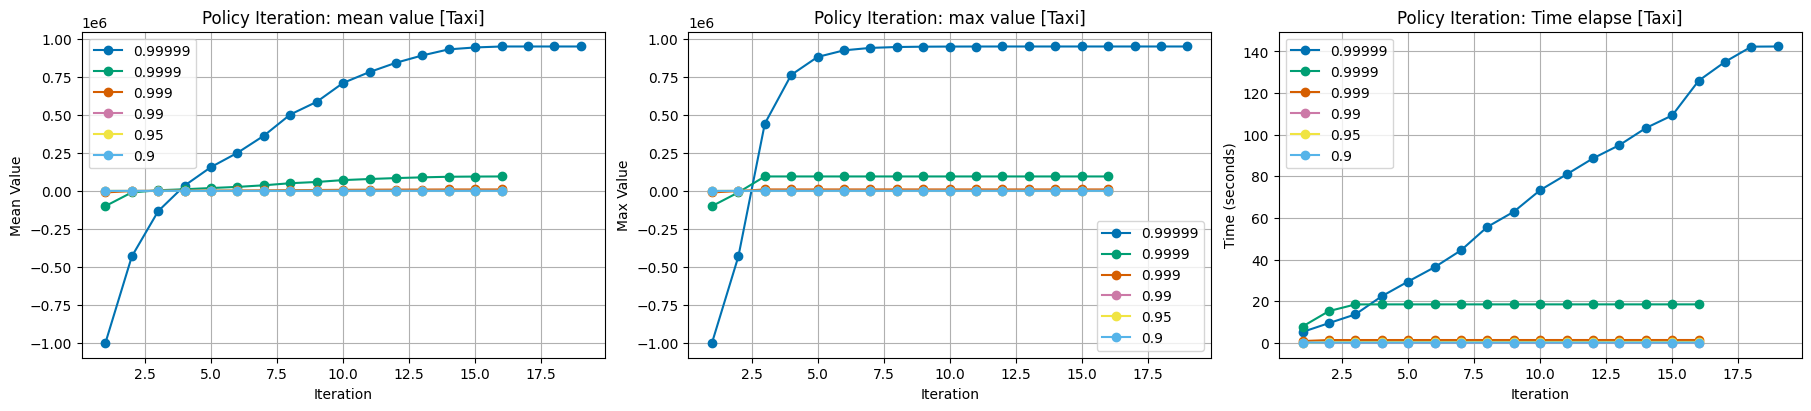

In [21]:
magic_plot(pi_results1, "Taxi", "Policy Iteration", "o-", [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9])

max mean v 578.5350669202915


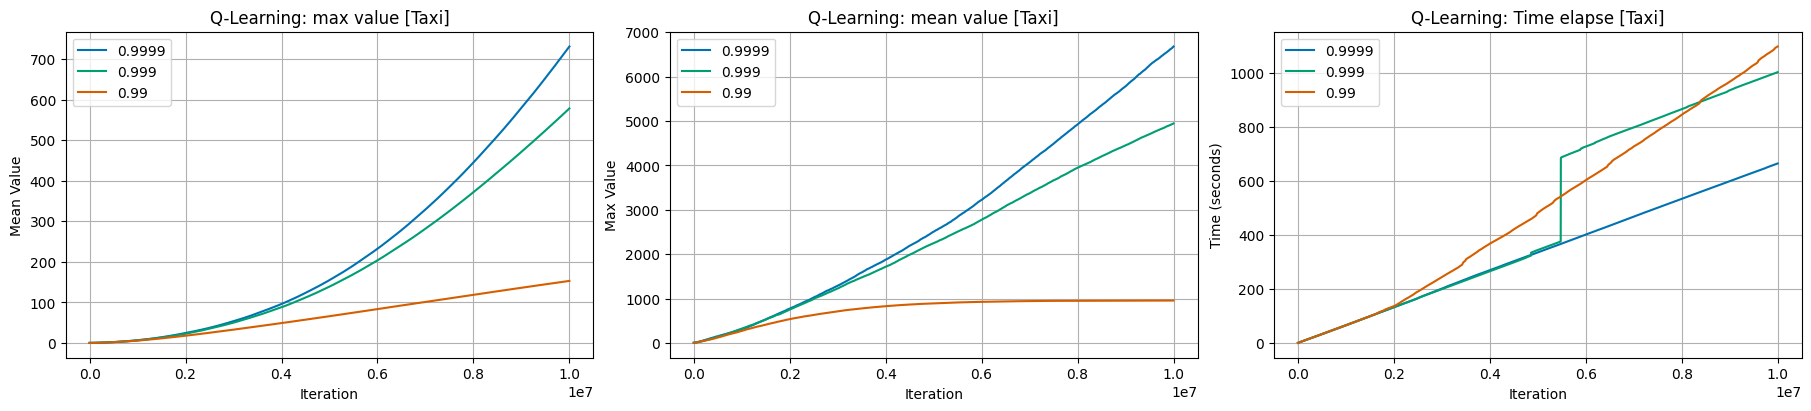

In [8]:
task = "Taxi"
method = "Q-Learning"
q_results1 = []
style = "-"
x_list = [0.9999, 0.999, 0.99]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "n_iter":10**7, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    q_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results1.append(q_result)
    num_iters = len(q_result["Mean V"])

print("max mean v", max(q_results1[1]["Mean V"]))
magic_plot(q_results1, task, method, style, x_list)

In [23]:
q_results1

[]

In [ ]:
magic_plot(q_results1, "Taxi", "Q-Learning", style, [0.9999, 0.999, 0.99])

In [ ]:
task = "Taxi"
method = "Q-Learning"
q_results1 = []
style = "-"
x_list = [0.9999]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "n_iter":10**8, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    q_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results1.append(q_result)
    num_iters = len(q_result["Mean V"])

print("max mean v", max(q_results1[1]["Mean V"]))
magic_plot(q_results1, task, method, style, x_list)

In [ ]:
from utils import *
plot_heatmap_value_function(vi.V, 5, 5)

In [ ]:
task = "Taxi"
method = "Value Iteration"
style = "-"
vi_results2 = []
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1)]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.ValueIteration(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    vi_results2.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(vi_results2[1]["Mean V"]))
magic_plot(vi_results2, task, method, style, x_list)

In [ ]:
task = "Taxi"
method = "Policy Iteration"
pi_results1 = []
style = "o-"
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1)]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    pi_results1.append(pi_result)
    num_iters = len(pi_result["Mean V"])

print("max mean v", max(pi_results1[1]["Mean V"]))
magic_plot(pi_results1, task, method, style, x_list)

In [ ]:
task = "Taxi"
method = "Q-Learning"
q_results2 = []
style = "-"
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1)]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "n_iter":10**7, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    q_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results2.append(q_result)
    num_iters = len(q_result["Mean V"])

print("max mean v", max(q_results2[1]["Mean V"]))
magic_plot(q_results2, task, method, style, x_list)

In [ ]:
q_mdp = mdp.QLearning(P, R, 0.99, epsilon=0.0,epsilon_decay=.95, n_iter=10**6, alpha=0.95, skip_check=True)
q_mdp.run()
q_mdp.policy

max mean v 6.594834350215106


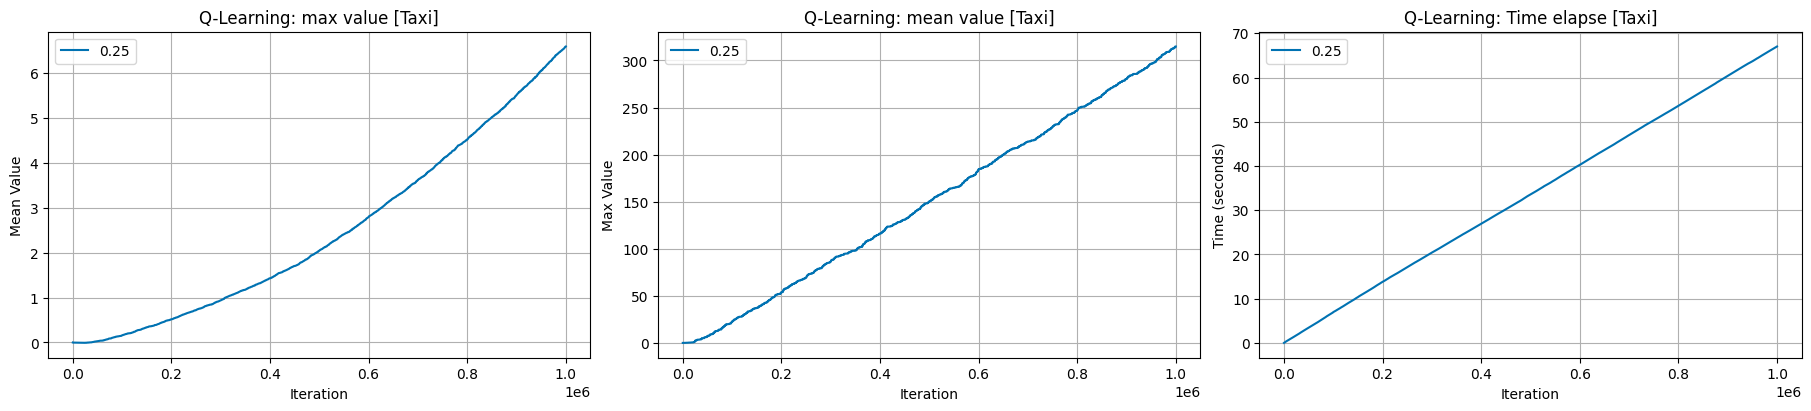

(4,
 4,
 3,
 0,
 1,
 2,
 3,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 5,
 2,
 5,
 3,
 3,
 3,
 1,
 0,
 0,
 2,
 3,
 3,
 2,
 2,
 0,
 1,
 3,
 1,
 1,
 5,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 0,
 2,
 0,
 3,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 5,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 0,
 3,
 3,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 3,
 0,
 4,
 3,
 0,
 1,
 2,
 2,
 0,
 3,
 3,
 3,
 0,
 3,
 5,
 5,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 2,
 0,
 1,
 2,
 0,
 2,
 3,
 1,
 0,
 3,
 0,
 3,
 1,
 1,
 5,
 2,
 3,
 0,
 2,
 2,
 3,
 1,
 3,
 1,
 0,
 2,
 2,
 0,
 1,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 2,
 5,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 0,
 3,
 1,
 2,
 0,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 0,
 3,
 5,
 3,
 0,
 1,
 2,
 3,
 2,
 3,
 1,
 2,
 0,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,
 1,
 0,
 2,
 3,
 3,
 0,
 1,
 4,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 3,
 1,
 1,
 0,


In [14]:
task = "Taxi"
method = "Q-Learning"
q_results4 = []
style = "-"
x_list = [0.25]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":x, "n_iter":10**7, "skip_check":True}
    q_mdp = mdp.QLearning(P, R, 0.999, epsilon=0.25,epsilon_decay=.95, n_iter=10**6, alpha=0.2, skip_check=True)
    q_mdp.run()
    # q = mdp.QLearning(**args)
    # q.run()

    q_result4 = record(q_mdp.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results4.append(q_result4)
    num_iters = len(q_result4["Mean V"])

print("max mean v", max(q_results4[0]["Mean V"]))
magic_plot(q_results4, task, method, style, x_list)

q_mdp.policy

In [16]:
len(q_mdp.policy)

500